In [1]:
# load libraries
%matplotlib inline
import imageio
import fiona
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import time
import os
from mapclassify import Quantiles, EqualInterval
warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\ACER\anaconda3\lib\site-packages\geopandas-0.12.2-py3.8.egg\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Connect to excel, just read rows and columns that are neccesary
df = pd.read_excel ('2_cuadro_8.5_3.xlsx', usecolsstr = 'A:O', nrows = 28) 

In [3]:
# Visualize tabular data
df

,Departamento,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Total,151560,160848,181866,240438.0,271813.0,299474.0,326578.0,349323.0,355876,399869,466088,446508,320819,403071
1,Amazonas,1247,860,640,3309.0,4037.0,4806.0,3178.0,2395.0,3340,5696,6222,6039,4651,5242
2,Áncash,5381,5744,6626,6325.0,7097.0,7618.0,8783.0,9862.0,10446,11798,13793,16980,11538,14634
3,Apurímac,1191,1267,1389,1855.0,2412.0,2993.0,2533.0,1601.0,2000,2566,4549,3821,3848,4618
4,Arequipa,10469,11110,10935,12762.0,13556.0,14167.0,16576.0,18017.0,19666,25500,28112,24856,19588,25087
5,Ayacucho,2221,2124,1856,3299.0,3625.0,3989.0,4786.0,4395.0,3131,4574,6220,5572,5028,6372
6,Cajamarca,3137,2665,3851,3775.0,5223.0,6820.0,6100.0,5847.0,6440,9453,10856,10196,9596,11900
7,Prov. Const. del Callao,8219,8935,10010,12749.0,13233.0,14631.0,15765.0,19328.0,15385,14948,22048,19297,12670,14648
8,Cusco,4767,5742,6445,7145.0,8542.0,9830.0,14328.0,9271.0,11783,13728,15819,15771,12333,14801
9,Huancavelica,110,273,600,879.0,962.0,1045.0,1917.0,1223.0,1345,1483,1582,1227,1438,2363


In [4]:
# Connecting with spatial data (shapefile)
shp_file = 'DEPARTAMENTO.shp'
gdf = gpd.read_file(shp_file)

In [5]:
# Visualize spatial data
gdf.columns

Index(['DEPARTAMEN', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'], dtype='object')

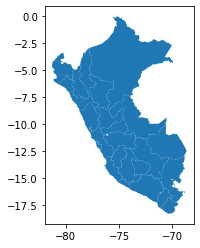

In [6]:
# Visualize spatial data
gdf.plot()

In [7]:
# Removing accents in the field DEPARTAM using field Departamento, and converting to upper case
df['DEPARTAMEN'] = df['Departamento'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')\
                         .str.upper()

# Changing some values in fiel DEPARTAM manually
df['DEPARTAMEN']  = df['DEPARTAMEN'].replace(['PROV. CONST. DEL CALLAO','LIMA 2/'],\
                                             ['CALLAO','LIMA'])

In [23]:
# Visualize merged data
df.head()

,Departamento,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,DEPARTAMEN
0,Total,151560,160848,181866,240438.0,271813.0,299474.0,326578.0,349323.0,355876,399869,466088,446508,320819,403071,TOTAL
1,Amazonas,1247,860,640,3309.0,4037.0,4806.0,3178.0,2395.0,3340,5696,6222,6039,4651,5242,AMAZONAS
2,Áncash,5381,5744,6626,6325.0,7097.0,7618.0,8783.0,9862.0,10446,11798,13793,16980,11538,14634,ANCASH
3,Apurímac,1191,1267,1389,1855.0,2412.0,2993.0,2533.0,1601.0,2000,2566,4549,3821,3848,4618,APURIMAC
4,Arequipa,10469,11110,10935,12762.0,13556.0,14167.0,16576.0,18017.0,19666,25500,28112,24856,19588,25087,AREQUIPA


In [9]:
# Joining spatial and tabular data by a field in commom
result = pd.merge(gdf, df, how="inner", on=["DEPARTAMEN"])

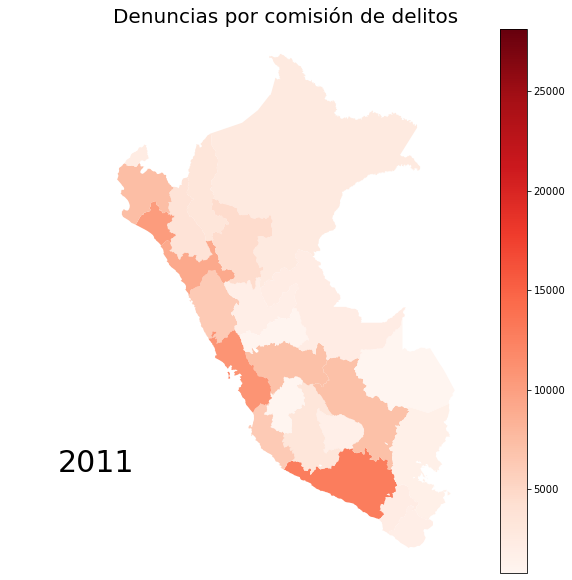

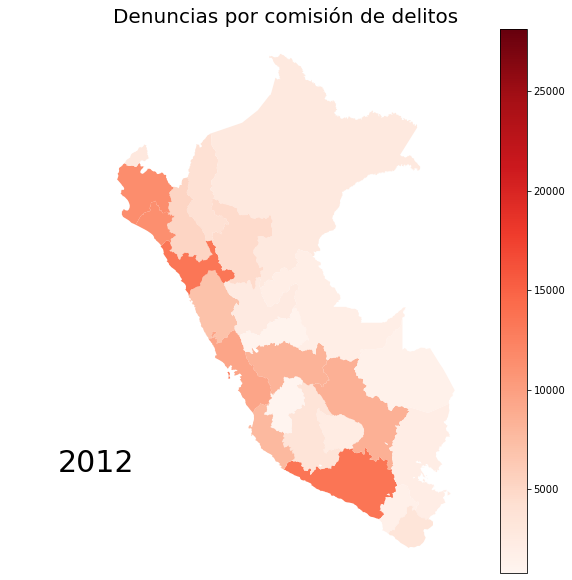

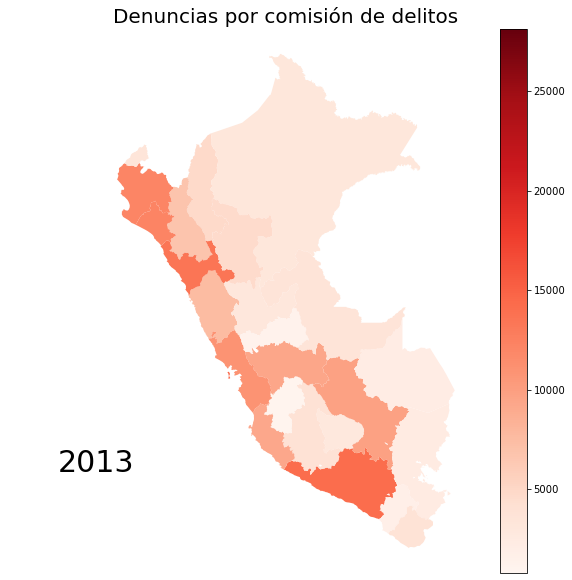

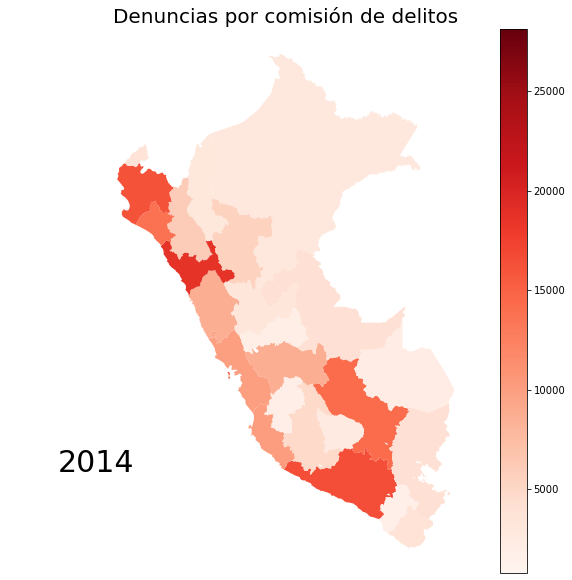

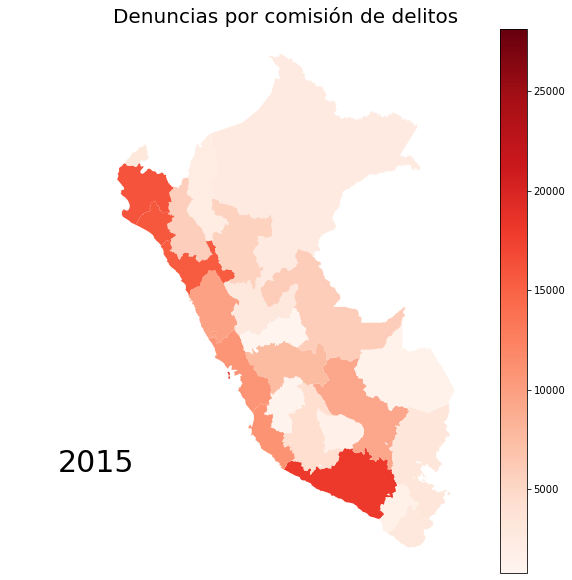

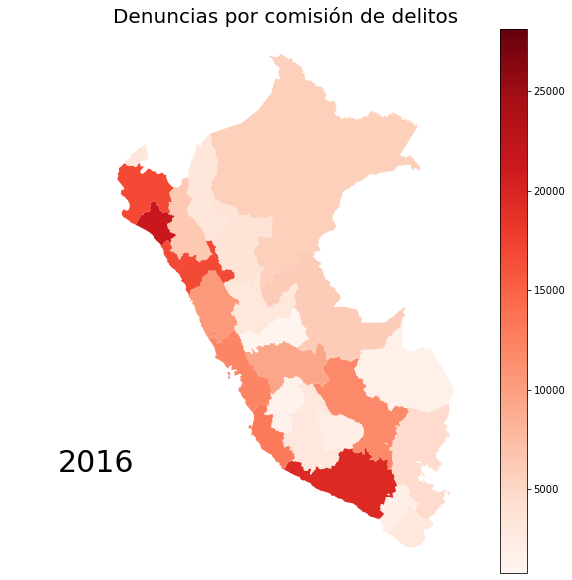

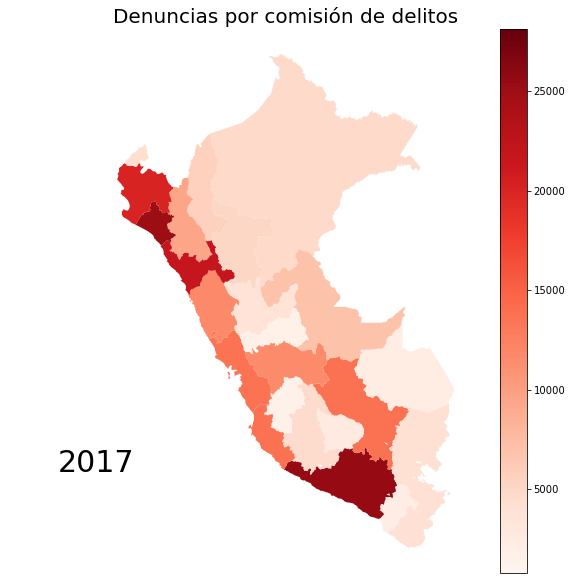

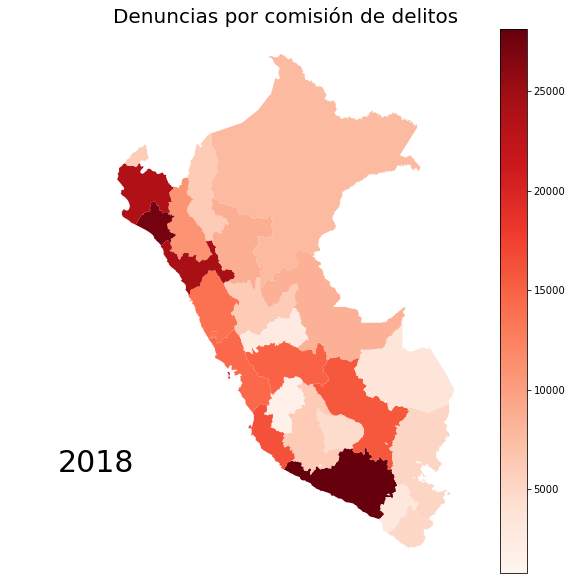

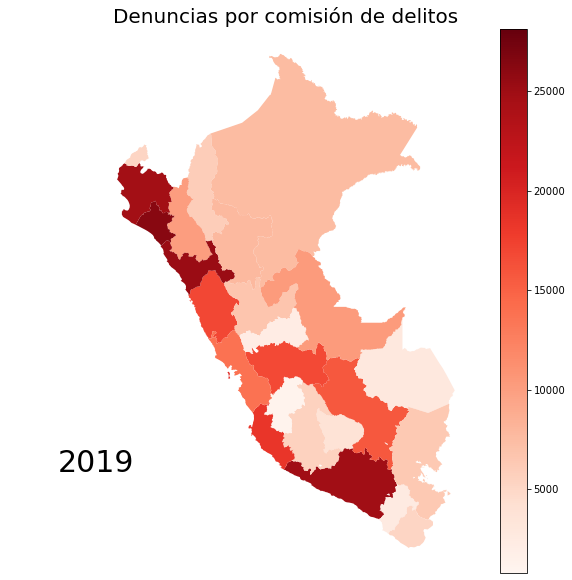

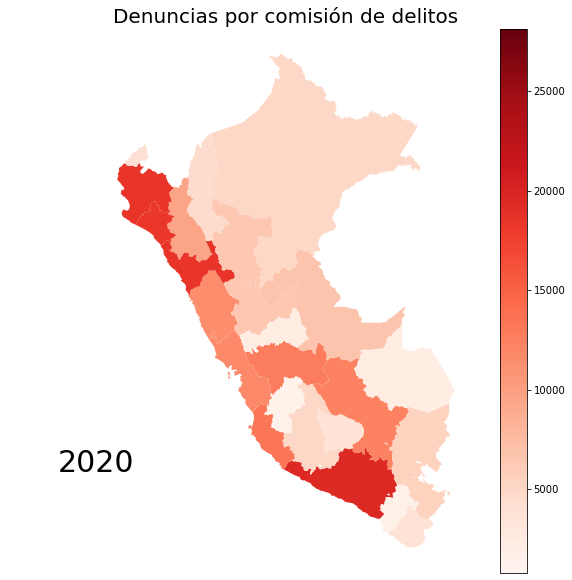

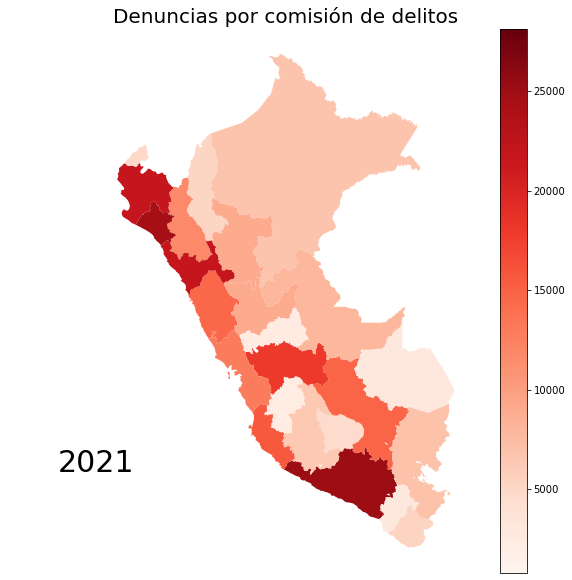

In [11]:
# Make a loop that create maps per year

# Path to saving maps
output_path = r'\MAPAS'

# Loop counter
i = 0

# List of years 
lista_etiqueta = df.columns.tolist()[4:-1]

# Max and min values showing in the map
vmin, vmax = result[lista_etiqueta].min().min(), result[lista_etiqueta].max().max()

# Loop that create map per year
for e in lista_etiqueta:
    
    # Create map
    fig = result.plot(column = e, cmap='Reds', figsize=(10,10), linewidth=0, edgecolor='0.8', vmin=vmin, vmax=vmax, 
                       legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax)) # UDPATE: added plt.Normalize to keep the legend range the same for all maps)

    # Delete axes
    fig.axis('off')
    
    # Add tittle
    fig.set_title('Denuncias por comisión de delitos', \
              fontdict={'fontsize': '20',
                         'fontweight' : '3'})

    # Add annotation with the year
    fig.annotate(str(e),
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=30)
    
    # 
    This will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join('Denuncias'+str(e)+'.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)     

In [22]:
# I
files = [f for f in os.listdir(os.getcwd()) if os.path.isfile(f) and f[-4:] == '.png']
images = []
for f in files:
    images.append(imageio.imread(f))
imageio.mimsave('movie.gif', images, duration = '1', fps = 60)